<a href="https://colab.research.google.com/github/rexxar280903/Dicoding/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Kanza Az Zahrawani
- **Email:** mc315d5y1202@student.devacademy.id
- **ID Dicoding:** mc315d5y1202

## Menentukan Pertanyaan Bisnis

- pada musim apa banyak dan sedikit orang merental sepeda?
- pada cuaca apa banyak dan sedikit orang merental sepeda?
- pada jam berapa terjadi banyak perentalan sepeda?
- apa urutan cuaca orang banyak merental sepeda dari yang terbesar?



## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Data Wrangling

### Gathering Data

**Insight:**
- data diambil dari website kaggle berikut [Link ke dataset di Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data?select=Readme.txt)

- pada website ini terdapat 2 file berisi data nya, namun kedunya mirip yang membedakan cuma salah satu file lebih lengkap karena membuat informasi setiap jamnya


### Assessing Data

#### import file

In [15]:
data = pd.read_csv("visualisasi\dataset\hour.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_3480\3958868214.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv("visualisasi\dataset\hour.csv")


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### mengecek null

In [17]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
data telah dibersihkan, sehingga tidak ada lagi kolom yang kosong 

In [18]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### cek duplikat

In [19]:
data.duplicated().sum()

np.int64(0)

### Cleaning Data

**Insight:**
- karena pada data ini tidak ada missing value maka tahap ini bisa dilewati


#### mengecek outlier

##### windspeed

{'whiskers': [<matplotlib.lines.Line2D at 0x213423cd550>,
 'caps': [<matplotlib.lines.Line2D at 0x213421d7350>,
 'boxes': [<matplotlib.lines.Line2D at 0x213423cce90>],
 'medians': [<matplotlib.lines.Line2D at 0x213423c5610>],
 'fliers': [<matplotlib.lines.Line2D at 0x213423c5df0>],
 'means': []}

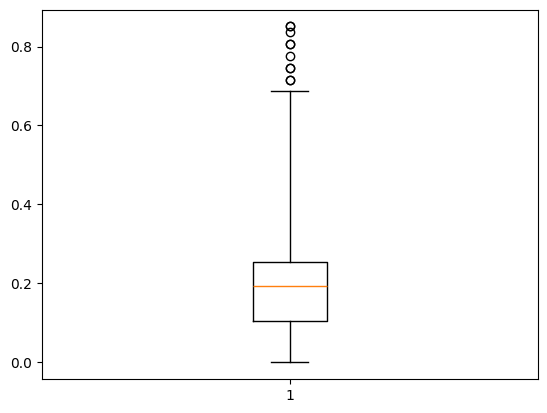

In [20]:
plt.boxplot(data['windspeed'],whis=3)

(array([2.180e+03, 6.475e+03, 4.465e+03, 2.458e+03, 1.137e+03, 4.340e+02,
        1.670e+02, 4.800e+01, 9.000e+00, 6.000e+00]),
 array([0.     , 0.08507, 0.17014, 0.25521, 0.34028, 0.42535, 0.51042,
        0.59549, 0.68056, 0.76563, 0.8507 ]),
 <BarContainer object of 10 artists>)

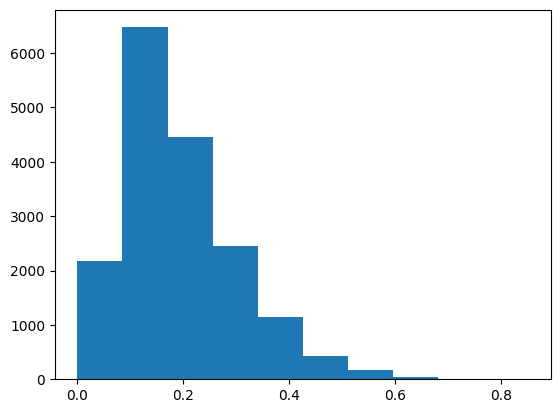

In [21]:
plt.hist(data['windspeed'])

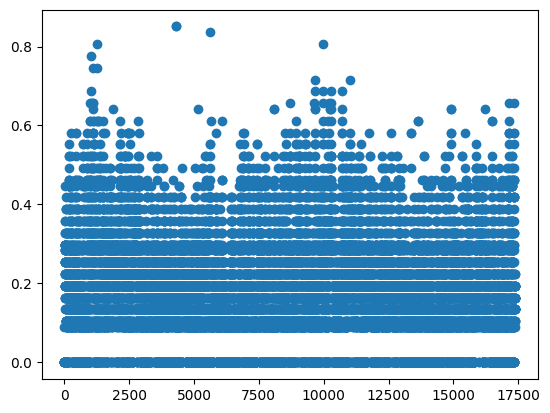

In [22]:
plt.scatter(range(len(data['windspeed'])),data['windspeed'])

#### registered

{'whiskers': [<matplotlib.lines.Line2D at 0x21342ec9370>,
 'caps': [<matplotlib.lines.Line2D at 0x21342485100>,
 'boxes': [<matplotlib.lines.Line2D at 0x21342f155b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21342f15940>],
 'fliers': [<matplotlib.lines.Line2D at 0x21342f15c40>],
 'means': []}

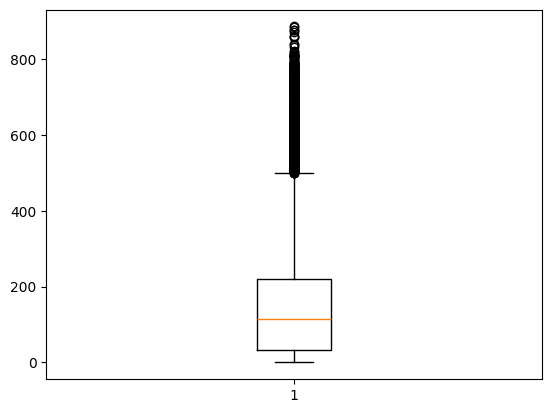

In [23]:
plt.boxplot(data['registered'])

(array([7262., 4279., 2764., 1341.,  727.,  445.,  220.,  181.,  134.,
          26.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

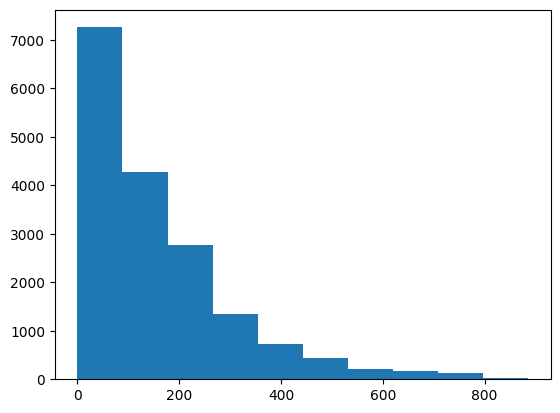

In [24]:
plt.hist(data['registered'])

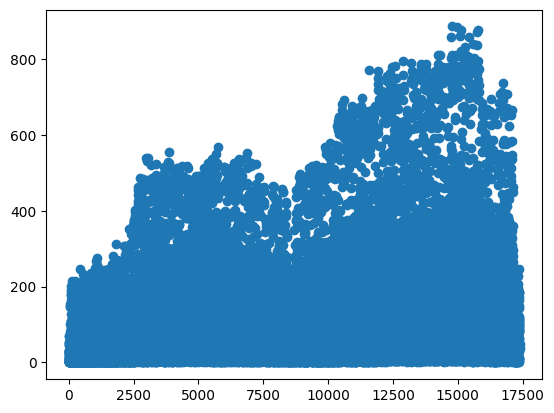

In [25]:
plt.scatter(range(len(data['registered'])), data['registered'])

#### Normalisasi data

In [41]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.1 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/11.1 MB 1.3 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/11.1 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.1 MB 811.6 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.1 MB 811.6 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.1 MB 811.6 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.1 MB 811.6 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.1 MB 811.6 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 536.9 kB/s eta 0:00:19
   ---- ----------------------------------- 1.3/11.1 MB 536.9 kB/s eta 0:00:19

In [42]:
from sklearn.preprocessing import MinMaxScaler
# Kolom numerik yang akan dinormalisasi
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Cek hasil
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit      temp   atemp   hum  windspeed    casual  registered  \
0           1  0.224490  0.2879  0.81        0.0  0.008174    0.014673   
1           1  0.204082  0.2727  0.80        0.0  0.021798    0.036117   
2           1  0.204082  0.2727  0.80        0.0  0.013624    0.030474   
3           1  0.224490  0.2879  0.75        0.0  0.008174    0.011287   
4           1  0.224490  0.2879  0.75        0.0  0.000000    0.001129   

        cnt  
0  0.015369  
1  0.039959  
2  0.031762  
3  0.012295  
4  0.000000  


## Exploratory Data Analysis (EDA)

### Explore ...

In [43]:
data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.486722,0.475775,0.627229,0.223460,0.097210,0.173574,0.193097
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.196486,0.171850,0.192930,0.143811,0.134346,0.170832,0.185848
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.326531,0.333300,0.480000,0.122840,0.010899,0.038375,0.039959
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.489796,0.484800,0.630000,0.228047,0.046322,0.129797,0.144467
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.653061,0.621200,0.780000,0.298225,0.130790,0.248307,0.286885


In [44]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.486722,0.475775,0.627229,0.223460,0.097210,0.173574,0.193097
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.196486,0.171850,0.192930,0.143811,0.134346,0.170832,0.185848
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.326531,0.333300,0.480000,0.122840,0.010899,0.038375,0.039959
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.489796,0.484800,0.630000,0.228047,0.046322,0.129797,0.144467
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.653061,0.621200,0.780000,0.298225,0.130790,0.248307,0.286885
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Insight:**
- rata-rata setiap hari perentalan sepeda itu sebanya 189 sepeda dirental, dengan sebaran data itu 181 sepeda
- minimal 1 sepedan dan maximal 977 sepeda yang merupakan outlier 
- mean itu 189 sementara median itu 142 yang menunjukkan data itu skewed right
- terlihat juga bahwa lebih banyak yang menyewa lewat registered dibanding casual 

## Visualization & Explanatory Analysis

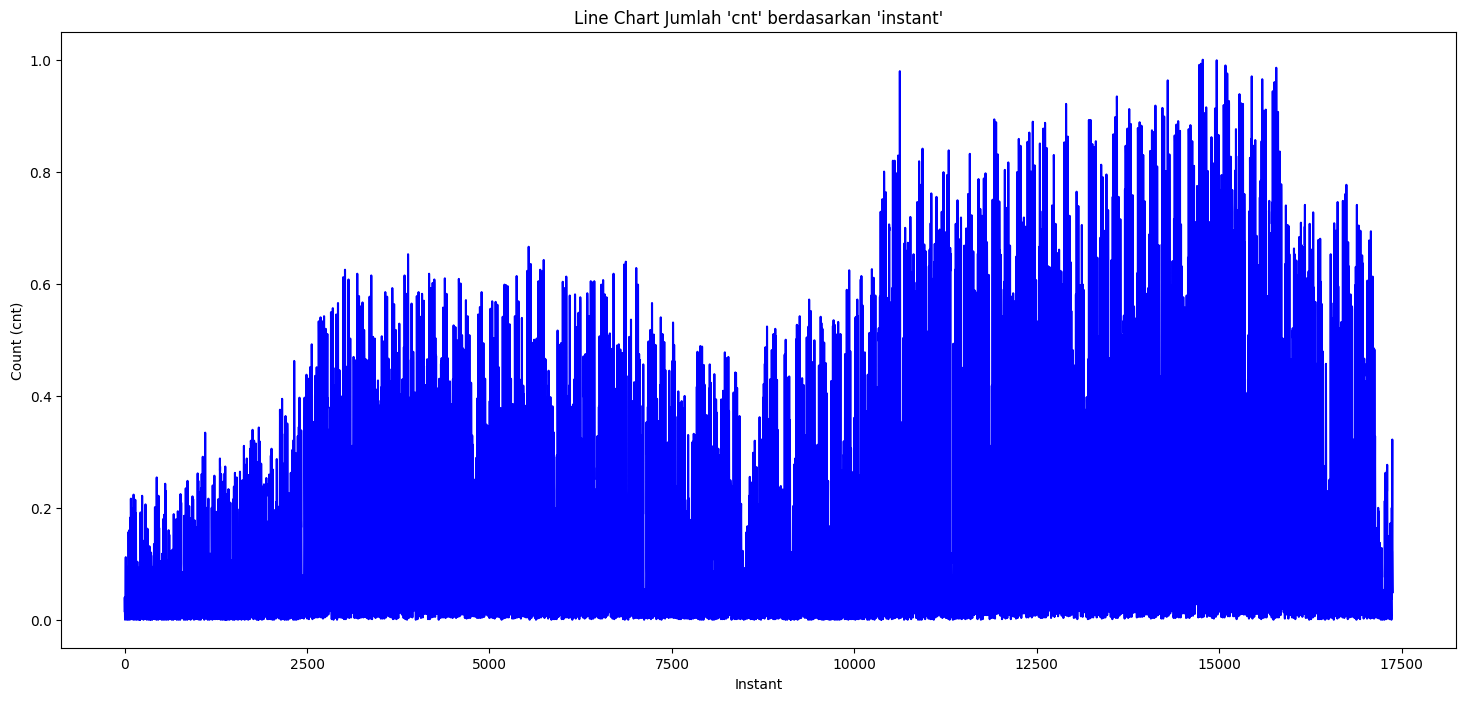

In [45]:
# Set ukuran figure sebelum memplot
plt.figure(figsize=(18, 8))

# Plot data
plt.plot(data['instant'], data['cnt'], color='b')

# Memberi judul dan label
plt.title("Line Chart Jumlah 'cnt' berdasarkan 'instant'")
plt.xlabel("Instant")
plt.ylabel("Count (cnt)")

# Menampilkan plot
plt.show()


### Pertanyaan 1: pada musim apa banyak dan sedikit orang merental sepeda?

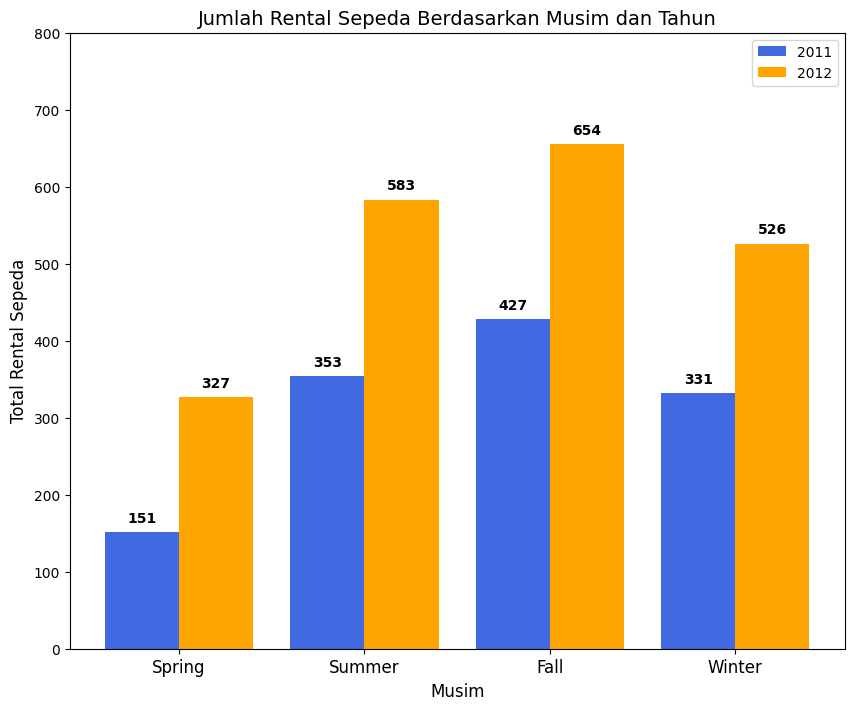

In [47]:

# **Mengelompokkan data berdasarkan musim dan tahun**
season_rentals = data.groupby(['season', 'yr'])['cnt'].sum().unstack()

# Sumbu X (jumlah musim)
x = np.arange(len(season_rentals.index))
width = 0.4  # Lebar batang

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 8))

# Membuat barchart dengan 2 batang untuk setiap musim (2011 & 2012)
rects1 = ax.bar(x - width/2, season_rentals[0], width, label="2011", color='royalblue')
rects2 = ax.bar(x + width/2, season_rentals[1], width, label="2012", color='orange')

# Menampilkan angka di atas batang
ax.bar_label(rects1, padding=5, fmt='%d', color='black', fontweight='bold')
ax.bar_label(rects2, padding=5, fmt='%d', color='black', fontweight='bold')

# **Menambahkan label musim pada sumbu X**
ax.set_xticks(x)
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'], fontsize=12)

# Menyesuaikan skala sumbu Y
ax.set_ylim(0, 800)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Rental Sepeda Berdasarkan Musim dan Tahun', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Rental Sepeda', fontsize=12)
plt.legend()  # Tambahkan keterangan untuk tahun

# Menampilkan grafik
plt.show()

**insight**
berdasarkan data pengelompokan ini bisa terlihat bahwa jumlah rentalan terbanyak itu ada pada musim fallm dan dan 2 tahun terakhir didata ini mengalami peningkatan dan permintaan terendah ada pada musim spring namun kenaikan pada tahun berikutnya mengalami kenaikan lebih dari 2x lipat pada musim tersebut

### Pertanyaan 2: - pada cuaca apa banyak dan sedikit orang merental sepeda?


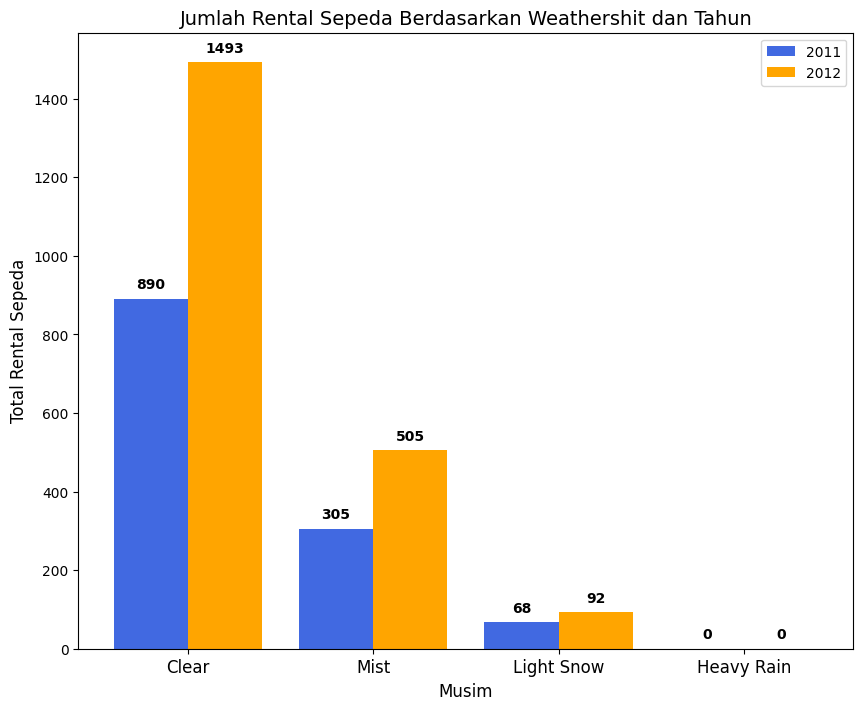

In [ ]:
weathershit_rentals = data.groupby(['weathersit','yr'])['cnt'].sum().unstack()

x = np.arange(len(weathershit_rentals.index))
width = 0.4

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 8))

# Membuat barchart dengan 2 batang untuk setiap musim (2011 & 2012)
rects1 = ax.bar(x - width/2, weathershit_rentals[0], width, label="2011", color='royalblue')
rects2 = ax.bar(x + width/2, weathershit_rentals[1], width, label="2012", color='orange')

# Menampilkan angka di atas batang
ax.bar_label(rects1, padding=5, fmt='%d', color='black', fontweight='bold')
ax.bar_label(rects2, padding=5, fmt='%d', color='black', fontweight='bold')

# **Menambahkan label musim pada sumbu X**
ax.set_xticks(x)
ax.set_xticklabels(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], fontsize=12)

# Menyesuaikan skala sumbu Y
ax.set_ylim(0, 2000)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Rental Sepeda Berdasarkan Weathershit dan Tahun', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Rental Sepeda', fontsize=12)
plt.legend()  # Tambahkan keterangan untuk tahun

# Menampilkan grafik
plt.show()



**Insight:**
- berdasarkan diagram ini disimpulkan bahwa rental sepeda terbanyak berada pada Clear dan yang tersedikit pada Heavy Rain

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2